In [1]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import SimilarityMaps

from syba import syba

import io
from PIL import Image

RDKit WARNING: [14:01:30] Enabling RDKit 2019.09.3 jupyter extensions


In [2]:
def show_png(data):
    bio = io.BytesIO(data)
    img = Image.open(bio)
    return img

# Draw structures with feasibility of atoms 

In [3]:
s = syba.SybaClassifier()
s.fitDefaultScore()

In [4]:
smiles = "CC1=CC=NC2=C1C(C#N)C1(CC21)C#C"
gdb = Chem.MolFromSmiles(smiles)
print(f"SYBA score {s.predict(mol=gdb)}")

SYBA score -12.99528210166078


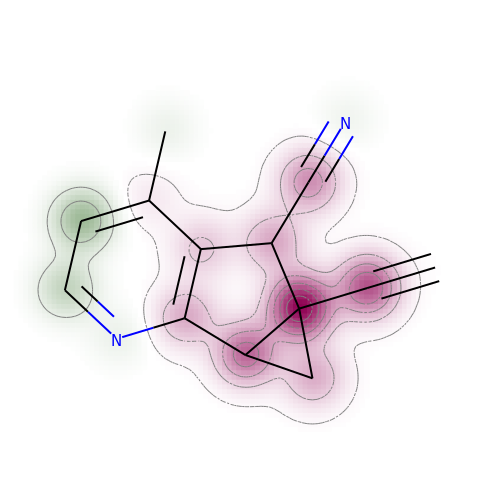

In [5]:
d = Draw.MolDraw2DCairo(500, 500)
con = s.fragment_contribution(mol=gdb)
fig = SimilarityMaps.GetSimilarityMapFromWeights(gdb,con,draw2d=d)
d.FinishDrawing()
show_png(d.GetDrawingText())

/home/milan/miniconda3/envs/nonpher/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


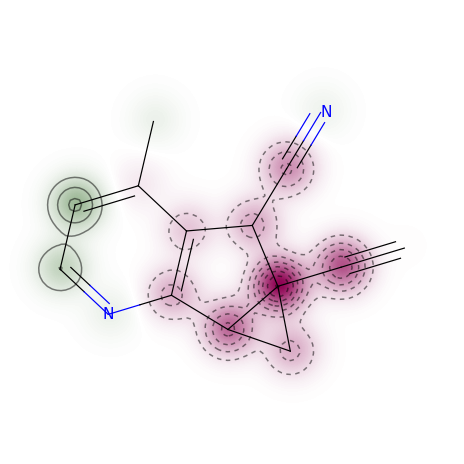

In [6]:
# for older versions of RDKit (Q1 2018)
con = s.fragment_contribution(mol=gdb)
fig = SimilarityMaps.GetSimilarityMapFromWeights(gdb,con)
fig.show()

In [7]:
#  ZINC458261876
smiles="O=C(CC1(O)CCCC1)NC1CCCC2CC21"
zinc = Chem.MolFromSmiles(smiles)
print(s.predict(mol=zinc))

9.712802017352452


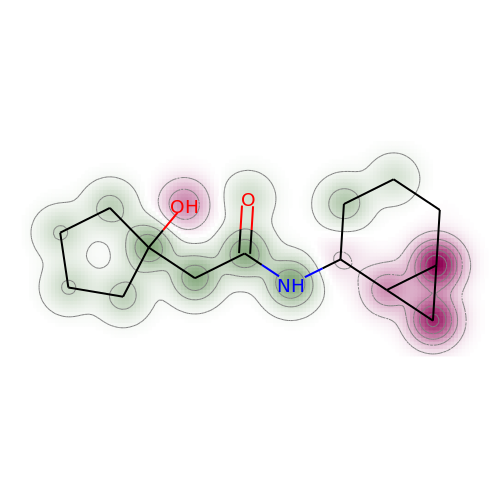

In [8]:
d = Draw.MolDraw2DCairo(500, 500)
con = s.fragment_contribution(mol=zinc)
fig = SimilarityMaps.GetSimilarityMapFromWeights(zinc,con,draw2d=d)
d.FinishDrawing()
show_png(d.GetDrawingText())